In [1]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_blobs, make_classification
from sklearn.cluster import SpectralClustering, KMeans, DBSCAN
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, squareform, cdist
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
import random
sns.set()
import sys

# Settings

In [2]:
#components = 1.1/1.2/2/3
#real_components = 4/5/6
components = 4
# normalized = 1(unnormalized)/2(Lrw)/3(Lsys)
normalized = 1
# doesn't change anything normalizing vecs
normalized_vecs = False

colors = ['#4bd670', '#496fd6', '#b54e3a', '#a83fba']
max_eigenvectors = 10

In [3]:
def one_component():
    global W
    global n_clusters
    
    n_clusters = 4
    W = np.array([
      [0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
      [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      [1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [4]:
def second_one_component():
    global W
    global n_clusters
    
    n_clusters = 3
    W = np.matrix([
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    ])

In [5]:
def two_components():
    global W
    global n_clusters
    
    n_clusters = 2
    W = np.matrix([
        [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [6]:
def three_components():
    global X
    global y
    global W
    global n_clusters
    global eps
    
    eps = 1.5
    n_clusters = 3
    X = np.array([
        [1, 3], [2, 1], [1, 1],
        [3, 2], [7, 8], [9, 8],
        [9, 9], [8, 7], [13, 14],
        [14, 14], [15, 16], [14, 15]
    ])
    y = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
    W = pairwise_distances(X, metric="euclidean")
    vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
    W = np.vectorize(vectorizer)(W)

In [7]:
def first_real():
    global X
    global y
    global W
    global n_clusters
    global eps
    
    eps = 1.5
    n_clusters = 3
    X, y = make_blobs(n_samples=300, random_state=170)
    y_param = 7.6
    W = np.exp(-y_param * cdist(X, X, metric='sqeuclidean'))

In [8]:
def second_real():
    global X
    global y
    global W
    global n_clusters
    global eps
    
    eps = 1.5
    n_clusters = 3
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    X, y = make_blobs(n_samples=300, random_state=170)
    X = np.dot(X, transformation)
    X = X[np.argsort(y), :]
    y = y[np.argsort(y)]
    y_param = 7.6
    W = np.exp(-y_param * cdist(X, X, metric='sqeuclidean'))

In [9]:
def third_real():
    global X
    global y
    global W
    global n_clusters
    global eps
    
    eps = 0.3
    n_clusters = 2
    X, y = make_classification(
        n_samples=1000,
        n_features=n_clusters,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=4)
    y_param = 7.6
    W = np.exp(-y_param * cdist(X, X, metric='sqeuclidean'))

In [10]:
if components == 1.1:
    one_component()
elif components == 1.2:
    second_one_component()
elif components == 2:
    two_components()
elif components == 3:
    three_components()
elif components == 4:
    first_real()
elif components == 5:
    second_real()
elif components == 6:
    third_real()
else:
    sys.exit(0)

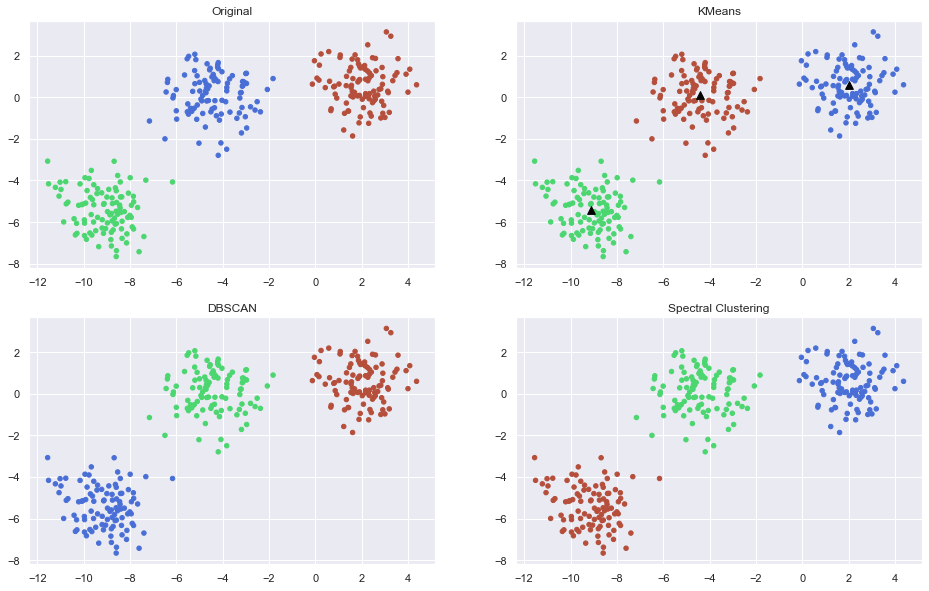

In [11]:
try:
    f, ax = plt.subplots(2, 2, figsize=(16, 10));
    
    col_clusters = [colors[i] for i in y]
    ax[0, 0].set_title('Original')
    ax[0, 0].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
    
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    y_pred = model.predict(X)
    
    col_clusters = [colors[i] for i in y_pred]
    ax[0, 1].set_title('KMeans')
    ax[0, 1].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
    ax[0, 1].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='^', c='black', s=60)
    
    model = DBSCAN(eps=eps, min_samples=9)
    y_pred = model.fit_predict(X)
    col_clusters = [colors[i] for i in y_pred]
    ax[1, 0].set_title('DBSCAN')
    ax[1, 0].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
    
    model = SpectralClustering(n_clusters=n_clusters)
    y_pred = model.fit_predict(X)
    col_clusters = [colors[i] for i in y_pred]
    ax[1, 1].set_title('Spectral Clustering')
    ax[1, 1].scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
except NameError:
    print("Doesn't have X")

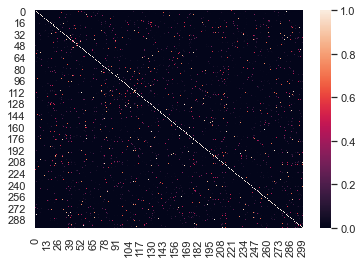

In [12]:
sns.heatmap(W);

In [13]:
if len(W) < 20:
    G = nx.from_numpy_matrix(W)
    nx.draw(G, with_labels=True)

In [14]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[1.548 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 2.615 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 4.194 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 4.756 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 2.504 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.911]]
laplacian matrix:
[[0.548 -0.000 -0.000 ... 0.000 -0.000 0.000]
 [-0.000 1.615 -0.000 ... -0.000 -0.000 -0.000]
 [-0.000 -0.000 3.194 ... -0.000 -0.000 -0.000]
 ...
 [0.000 -0.000 -0.000 ... 3.756 0.000 -0.001]
 [-0.000 -0.000 -0.000 ... 0.000 1.504 0.000]
 [0.000 -0.000 -0.000 ... -0.001 0.000 5.911]]


$$L=D-W$$
<br>
$$L_{sym}:=D^{-1/2}LD^{-1/2}=I-D^{-1/2}WD^{-1/2}$$
<br>
$$L_{rw}:=D^{-1}L=I-D^{-1}W$$

In [15]:
if normalized == 2:
    D = np.diag(np.power(np.diagonal(np.array(D, dtype=float)), -1))
    L = np.dot(D, L)
elif normalized == 3:
    D = np.diag(np.power(np.diagonal(D), -1/2))
    L = np.dot(np.dot(D, L), D)

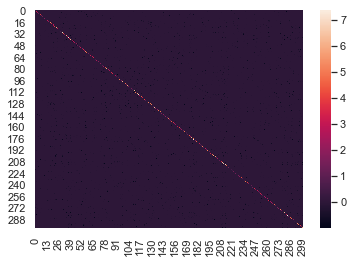

In [16]:
sns.heatmap(L);

In [17]:
vals, vecs = np.linalg.eig(L)
vals = vals.real
vecs = vecs.real
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

# eigenvalues
print('eigenvalues sorted:')
print(vals[:max_eigenvectors])

eigenvalues sorted:
[-0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.007]


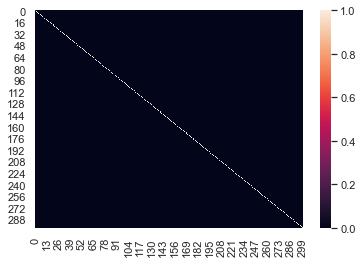

In [18]:
sns.heatmap(np.dot(np.transpose(vecs), vecs));

In [19]:
if normalized_vecs:
    vecs /= np.power(np.sum(np.power(vecs, 2), axis=1), 1/2)
    print(vecs)

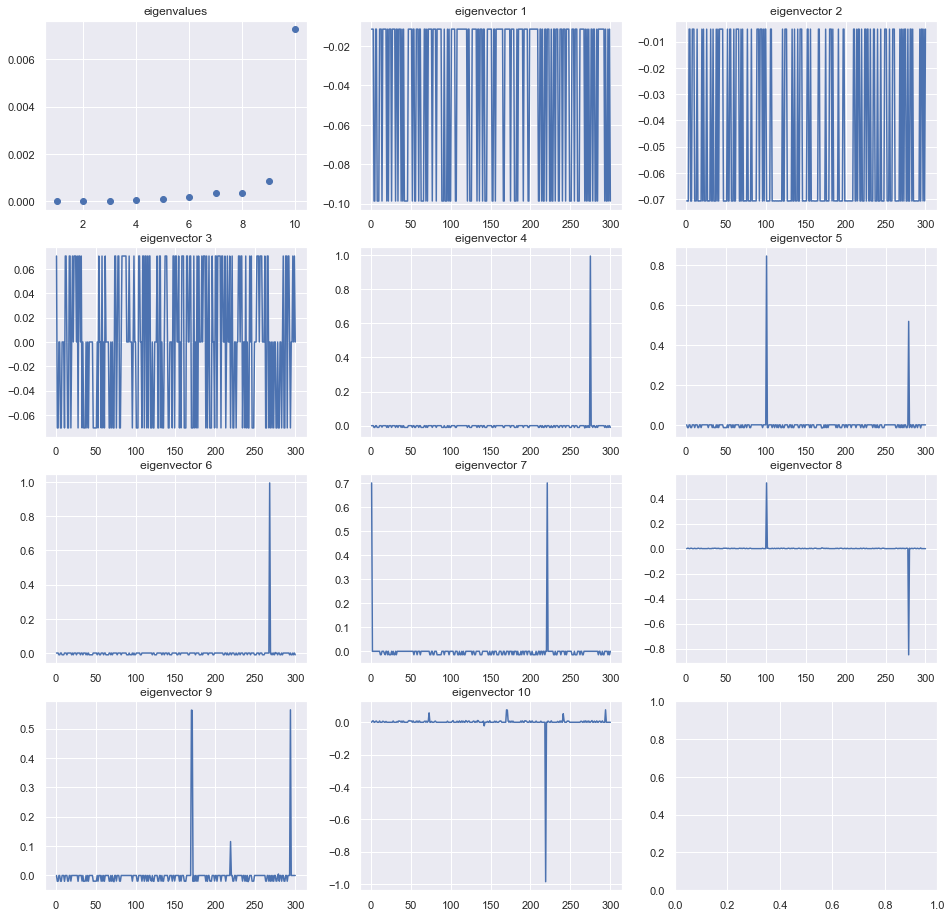

In [20]:
split = 3
f, ax = plt.subplots(max_eigenvectors // split + 1, split, figsize=(16, (max_eigenvectors // split + 1) * 4));

ax[0, 0].set_title('eigenvalues');
ax[0, 0].plot(list(range(1, max_eigenvectors + 1)), vals[:max_eigenvectors], 'o');

for i in range(1, max_eigenvectors + 1):
    ax[i // split, i % split].set_title(f'eigenvector {i}');
    ax[i // split, i % split].plot(list(range(1, len(vals) + 1)), vecs[:, i - 1]);

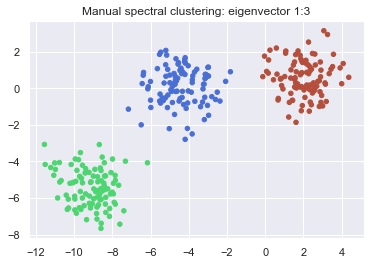

In [21]:
try:
    model = KMeans(n_clusters=n_clusters)
    model.fit(vecs[:, 0:n_clusters].reshape(-1, n_clusters))
    y_pred = model.predict(vecs[:, 0:n_clusters].reshape(-1, n_clusters))

    col_clusters = [colors[i] for i in y_pred]
    plt.title(f'Manual spectral clustering: eigenvector {1}:{n_clusters}')
    plt.scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
except NameError:
    print("Doesn't have X")

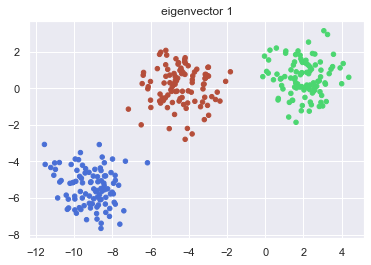

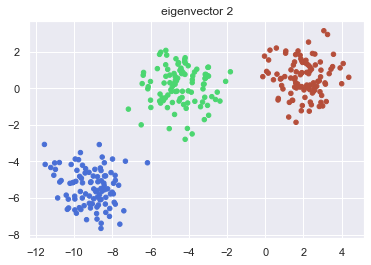

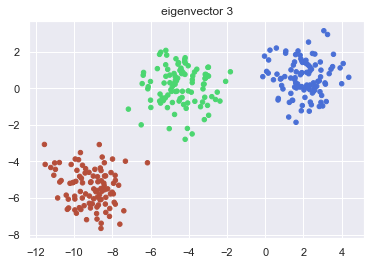

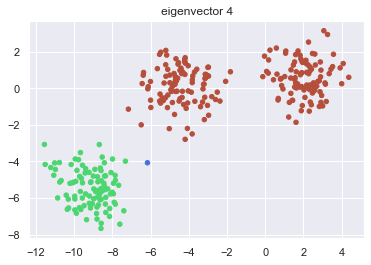

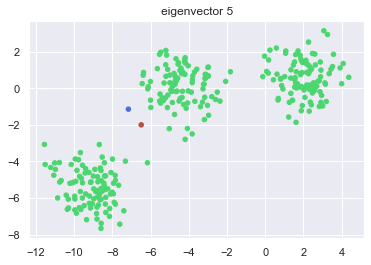

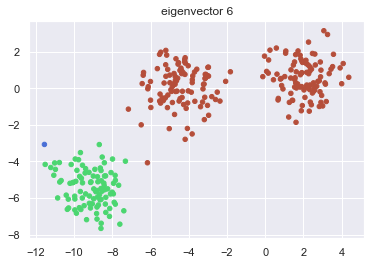

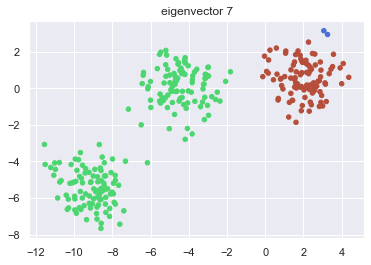

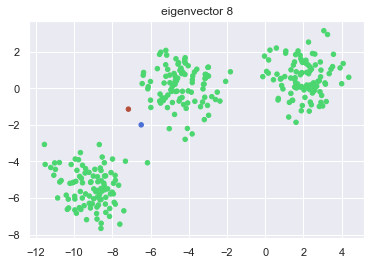

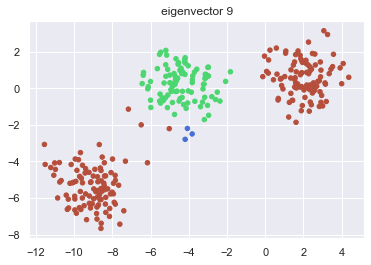

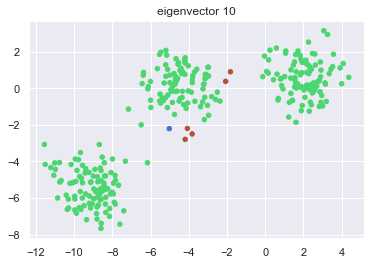

In [22]:
try:
    for i in range(max_eigenvectors):
        U = vecs[:, i].reshape(-1, 1)
        km = KMeans(init='k-means++', n_clusters=n_clusters)
        km.fit(U)

        col_clusters = [colors[i] for i in km.labels_]

        plt.figure(i)
        plt.title(f'eigenvector {i + 1}')
        plt.scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
except NameError:
    print("Doesn't have X")

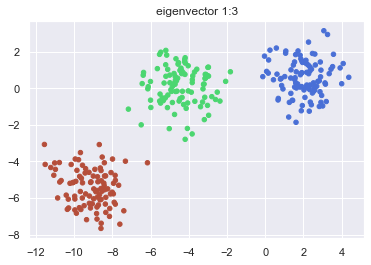

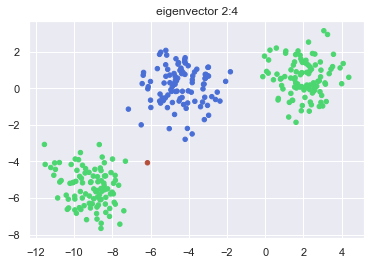

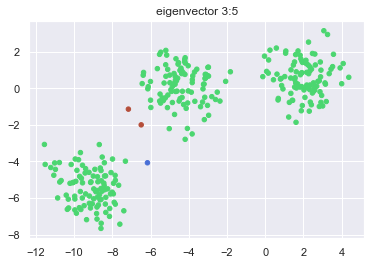

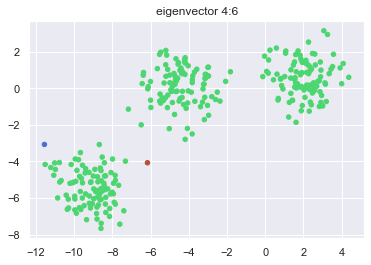

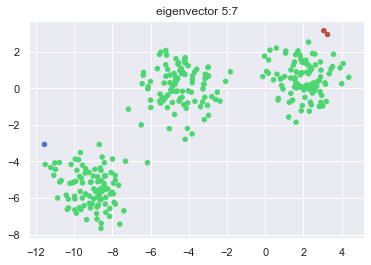

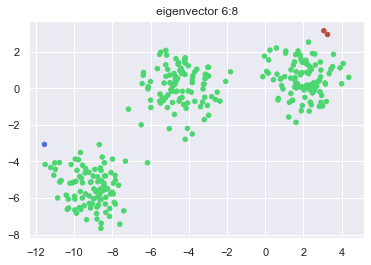

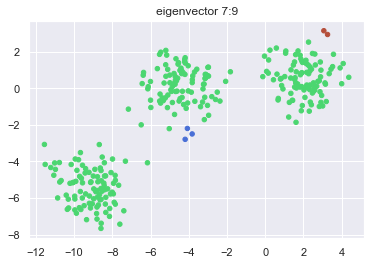

In [23]:
try:
    for i in range(max_eigenvectors - n_clusters):
        U = vecs[:, i:i+n_clusters].reshape(-1, n_clusters)
        km = KMeans(init='k-means++', n_clusters=n_clusters)
        km.fit(U)

        col_clusters = [colors[i] for i in km.labels_]

        plt.figure(i)
        plt.title(f'eigenvector {i + 1}:{i + n_clusters}')
        plt.scatter(X[:, 0], X[:, 1], c=col_clusters, s=20);
except NameError:
    print("Doesn't have X")